In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 1. 선 그래프 (Line Graph) 그리기
## 1.1 선 그래프(꺽은선 그래프)
- 점과 점을 선으로 연결한 그래프
- 시간의 흐름에 따른 변화를 표현할 때 많이 사용한다. (시계열)
- `plot([x], y)` 
    - 1번인수 : x값(생략가능), 2번인수 y값
    - 인수가 하나인 경우 y 축의 값으로 설정되고 X값은 (0 ~ len(y)-1) 범위로 지정된다.
    - x,y 의 인수는 리스트 형태의 객체들을 넣는다.
        - 리스트
        - 튜플
        - numpy 배열 (ndarray)
        - 판다스 Series
    - x와 y의 size는 같아야 한다.
- 하나의 axes(subplot)에 여러 개의 선 그리기
    - 같은 axes에 plot()를 여러번 실행한다.

## 1.2 선 스타일
- https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html

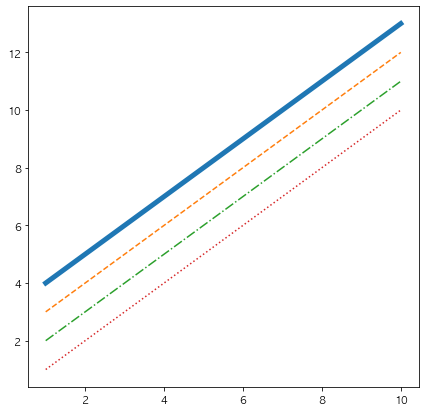

In [10]:
x = np.linspace(1, 10, num = 100)

plt.figure(figsize = (7, 7))
plt.plot(x, x + 3, linestyle = '-', linewidth = 5)  # linewidth로 굵기 조절
plt.plot(x, x + 2, linestyle = '--')
plt.plot(x, x + 1, linestyle = '-.')
plt.plot(x, x, linestyle = ':')  # 점선

plt.show()

## 1.3 선 그래프 활용
- [서울시 연도별 황사 경보발령 현황](http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-2227&srvType=S&serviceKind=1&currentPageNo=1)
- 연도별 관측일수와 황사최대농도의 변화를 그래프로 시각화

In [2]:
df = pd.read_csv('data/서울시 연도별 황사 경보발령 현황.csv')
df.shape

(12, 7)

In [3]:
df

,년도,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도(㎍/㎥/시)
0,2006,4,5,1,2,11,2941
1,2007,3,4,1,1,12,1355
2,2008,1,1,1,1,11,933
3,2009,2,3,2,3,9,1157
4,2010,4,5,2,3,15,1354
5,2011,4,7,0,0,9,662
6,2012,0,0,0,0,1,338
7,2013,0,0,0,0,3,226
8,2014,0,0,0,0,10,259
9,2015,1,2,1,2,15,902


In [4]:
df.rename({'최대농도(㎍/㎥/시)': '최대농도'}, axis = 1, inplace = True)
df

,년도,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도
0,2006,4,5,1,2,11,2941
1,2007,3,4,1,1,12,1355
2,2008,1,1,1,1,11,933
3,2009,2,3,2,3,9,1157
4,2010,4,5,2,3,15,1354
5,2011,4,7,0,0,9,662
6,2012,0,0,0,0,1,338
7,2013,0,0,0,0,3,226
8,2014,0,0,0,0,10,259
9,2015,1,2,1,2,15,902


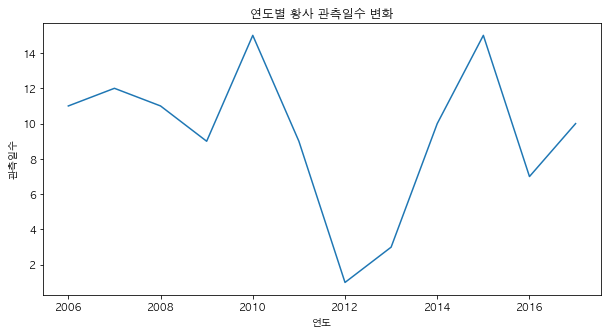

In [5]:
# 년도에 따른 관측일수의 변화흐름
plt.figure(figsize = (10, 5))
# x축: 년도 / y축: 관측일수
plt.plot(df['년도'], df['관측일수'])
plt.title('연도별 황사 관측일수 변화')
plt.xlabel('연도')
plt.ylabel('관측일수')
plt.show()

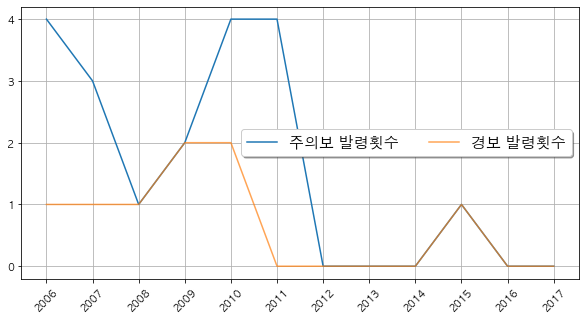

In [11]:
# 년도에 따른 주의보와 경보 발령횟수를 한 subplot에 그리기
plt.figure(figsize = (10, 5))

plt.plot(df['년도'], df['주의보 발령횟수'], label = '주의보 발령횟수')
plt.plot(df['년도'], df['경보 발령횟수'], label = '경보 발령횟수', alpha = 0.7)  # alpha: 투명도 설정 0:투명~1:불투명

# ticks 설정 - x, y축의 값들을 주어진 값들에 맞춰서 나오도록 설정 (지정한 값들이 라벨로 들어오도록)
plt.xticks(df['년도'], rotation = 45)  # 크기에 비해 x에 써져야할 값들이 많은 경우, rotation을 통해 각도를 돌려줄 수 있다.
plt.yticks(range(0, 5))

plt.legend(fontsize = 15, fancybox = True, shadow = True, ncol = 2)
plt.grid(True)
plt.show()

## 최대 농도와 관측일 수의 연도별 변화를 시각화
- ### 하나의 축을 공유하고 두개의 축을 가지는 그래프 그리기
- 값의 범위(Scale)이 다른 두 값과 관련된 선그래프를 한 Axes(subplot)에 그리는 경우
- X축을 공유해 2개의 Y축을 가지는 그래프
    - axes.twinx() 를 이용해 axes를 복사
- Y축을 공유해 2개의 X축을 가지는 그래프
    - axes.twiny() 를 이용해 axes를 복사

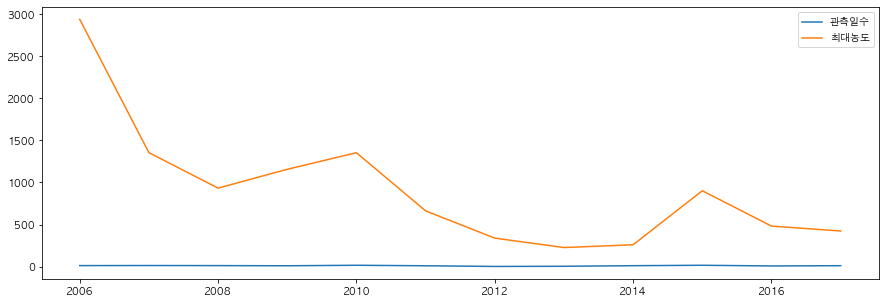

In [12]:
plt.figure(figsize = (15, 5))

plt.plot(df['년도'], df['관측일수'], label = '관측일수')
plt.plot(df['년도'], df['최대농도'], label = '최대농도')

plt.legend()
plt.show()

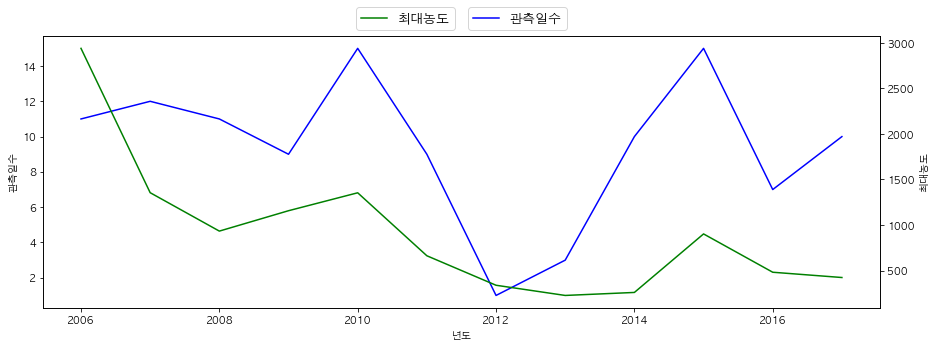

In [13]:
fig, ax1 = plt.subplots(figsize = (15, 5))  # 행, 열의 개수 생략 -> axes(subplot) 1개
#print(type(ax1))
ax2 = ax1.twinx()

ax1.plot(df['년도'], df['관측일수'], label = '관측일수', color = 'b')
ax2.plot(df['년도'], df['최대농도'], label = '최대농도', color = 'g')

#ax1.legend(loc = 'upper left')
ax1.legend(bbox_to_anchor = (0.5, 1), loc = 'lower left', fontsize = 13)
#ax2.legend(loc = 'upper right')
ax2.legend(bbox_to_anchor = (0.5, 1), loc = 'lower right', fontsize = 13)

ax1.set_xlabel('년도')
ax1.set_ylabel('관측일수')
ax2.set_ylabel('최대농도')
plt.show()

### legend box 위치지정
- loc = '수직방향위치 수평방향위치'
    - axes box내에 legend box를 위치시킬 때 사용
    - 수직방향위치: lower, upper
    - 수평방향위치: left, right
    - 정가운데: center
    - 기본: best(가장 적절한 위치를 알아서 잡는다.)
    
- bbox_to_anchor, loc
    - axes box 밖에 legend box를 위치시킬 때 사용
    - bbox_to_anchor: 0 ~ 1 사이의 실수, legend box를 axes box를 기준으로 어디에 둘건지 지정(x축위치, y축위치)
    - loc: legend box를 axes box의 어느 부분을 기준으로 놓을 것인지
    - -> loc를 설정하는 경우, 설정해둔 anchor 값의 위치가 legend box의 loc 위치에 있도록 설정하는 것

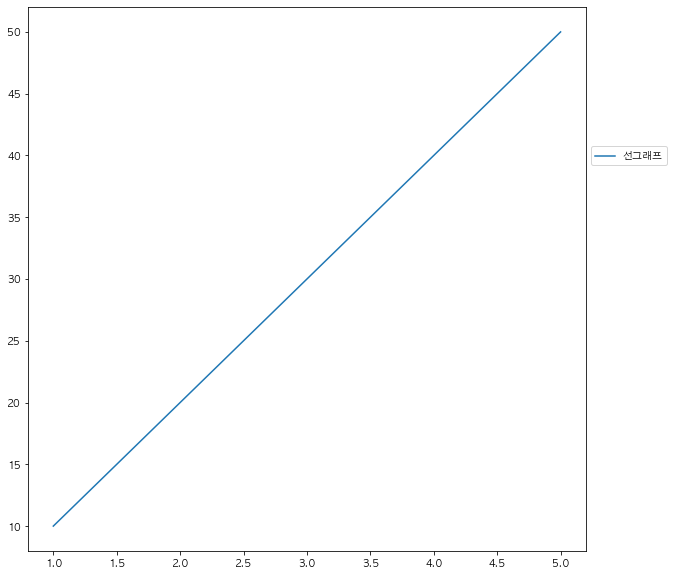

In [14]:
plt.figure(figsize = (10, 10))
plt.plot([1, 2, 3, 4, 5], [10, 20, 30, 40, 50], label = '선그래프')
#plt.legend(loc = 'lower left')
#plt.legend(loc = 'center')
#plt.legend(loc = 'right')
#plt.legend(bbox_to_anchor = (1, 1), loc = 'lower left')
plt.legend(bbox_to_anchor = (1, 0.7), loc = 'lower left')
plt.show()

# 2. 산점도 (Scatter Plot) 그리기
## 2.1 산점도(산포도)
- X와 Y축을 가지는 좌표평면상 관측값들을 점을 찍어 표시하는 그래프
- 변수(Feature)간의 상관성이나 관측값들 간의 군집 분류를 확인할 수 있다.
- `scatter()` 메소드 사용
    - 1번인수 : x값, 2번인수 y값
    - x와 y값들을 모두 매개변수로 전달해야 한다.
    - x,y 의 인수는 스칼라 실수나 리스트 형태의 객체들을 넣는다.
        - 리스트
        - 튜플
        - numpy 배열 (ndarray)
        - 판다스 Series
    - x와 y의 원소의 수는 같아야 한다.

In [24]:
x = np.arange(1, 1000, 50)
y = np.arange(1, 1000, 50)
z = np.arange(1, 1000, 20)
a = np.random.normal(10, 5, size = 20)
print(x.shape, z.shape, a.shape)

(20,) (50,) (20,)


In [19]:
for d in zip(x, y):
    print(d)

(1, 1)
(51, 51)
(101, 101)
(151, 151)
(201, 201)
(251, 251)
(301, 301)
(351, 351)
(401, 401)
(451, 451)
(501, 501)
(551, 551)
(601, 601)
(651, 651)
(701, 701)
(751, 751)
(801, 801)
(851, 851)
(901, 901)
(951, 951)


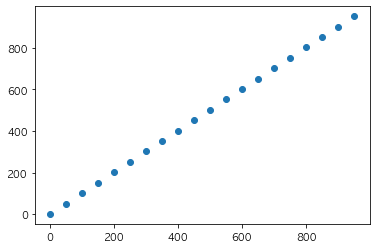

In [18]:
plt.scatter(x, y)
plt.show()

ValueError: x and y must be the same size

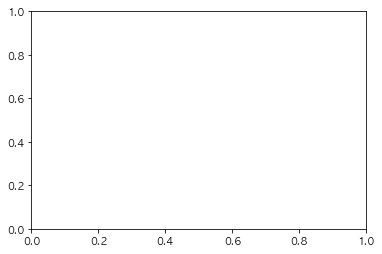

In [22]:
plt.scatter(x, z)  # x와 z의 크기가 다르기 때문에 에러 발생
# x, y에 들어가는 값들의 개수는 동일해야한다.

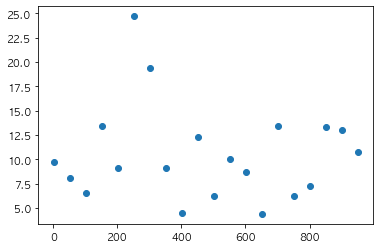

In [25]:
plt.scatter(x, a)
plt.show()

## 2.2 설정
- marker (마커)
    - marker란 점의 모양을 말하며 미리정의된 값으로 변경할 수있다.
    - scatter() 메소드의 marker 매개변수를 이용해 변경한다. 
    - https://matplotlib.org/api/markers_api.html
- s
    - 마커의 크기
- alpha    
    - 하나의 마커에 대한 투명도
    - 0 ~ 1 사이 실수를 지정 (default 1)

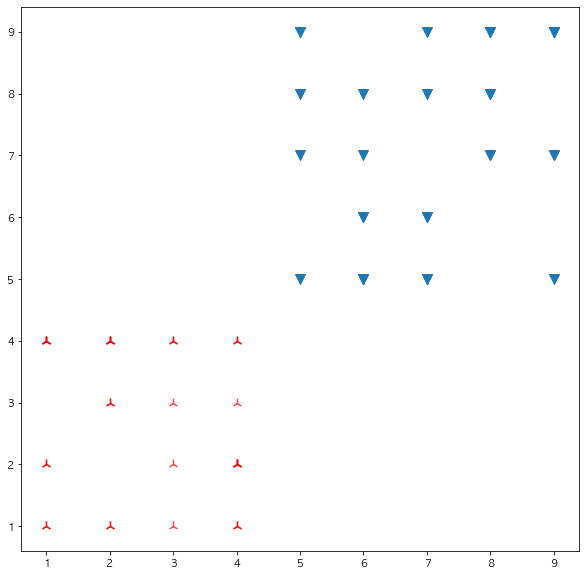

In [34]:
np.random.seed(0)

plt.figure(figsize = (10, 10))
plt.scatter(x = np.random.randint(1, 5, 30), 
            y = np.random.randint(1, 5, 30),
            marker = '2', s = 100, color = 'r', alpha = 0.7)
plt.scatter(x = np.random.randint(5, 10, 30),
            y = np.random.randint(5, 10, 30),
            marker = 'v', s = 100)
plt.show()

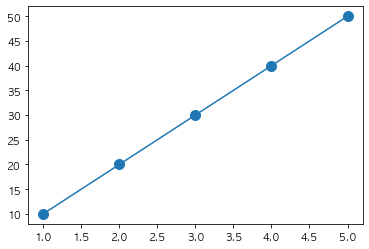

In [37]:
plt.plot([1, 2, 3, 4, 5], [10, 20, 30, 40, 50], marker = 'o', markersize = 10)
plt.show()

## 2.3 산점도 활용

In [38]:
df

,년도,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도
0,2006,4,5,1,2,11,2941
1,2007,3,4,1,1,12,1355
2,2008,1,1,1,1,11,933
3,2009,2,3,2,3,9,1157
4,2010,4,5,2,3,15,1354
5,2011,4,7,0,0,9,662
6,2012,0,0,0,0,1,338
7,2013,0,0,0,0,3,226
8,2014,0,0,0,0,10,259
9,2015,1,2,1,2,15,902


### 경보 발령횟수와 관측일수 간의 관계

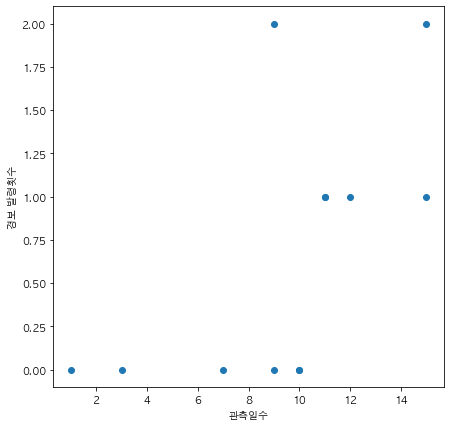

In [41]:
plt.figure(figsize = (7, 7))
plt.scatter(df['관측일수'], df['경보 발령횟수'])
plt.xlabel('관측일수')
plt.ylabel('경보 발령횟수')
plt.show()

- 상관계수
    - 두 변수(컬럼)간의 상관관계를 계산한 값
    - 양의 상관관계: 변수 하나의 값이 증가할 때, 다른 하나의 값도 같이 증가하는 것
        - 0 ~ 1 (양수)
    - 음의 상관관계: 변수 하나의 값이 증가할 때, 다른 하나의 값은 감소하는 것
        - -1 ~ 0 (음수)
    - numpy.corrcoef(변수, 변수) - 변수는 array_like(배열, 리스트, Series)
    - pd.corr(  )
        - -1 ~ 1
        - 1 ~ 0.7 / -1 ~ -0.7: 아주 강한 상관관계
        - 0.7 ~ 0.3 / -0.7 ~ -0.3: 강한 상관관계
        - 0.3 ~ 0.1 / -0.3 ~ -0.1: 약한 상관관계
        - 0.1 ~ 0 / -0.1 ~ 0: 관계없다.

In [45]:
corr = np.corrcoef(df['관측일수'], df['경보 발령횟수'])
corr

array([[1.        , 0.60416124],
       [0.60416124, 1.        ]])

In [44]:
df[['관측일수', '경보 발령횟수']].corr()

,관측일수,경보 발령횟수
관측일수,1.000000,0.604161
경보 발령횟수,0.604161,1.000000


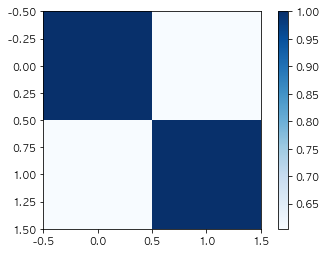

In [50]:
# 상관관계를 heatmap 형태로 시각화
plt.imshow(corr, cmap = 'Blues')
plt.colorbar()
plt.show()

In [51]:
df.corr()

,년도,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도
년도,1.000000,-0.706913,-0.612401,-0.582975,-0.501745,-0.201694,-0.733651
주의보 발령횟수,-0.706913,1.000000,0.975781,0.562544,0.566468,0.515552,0.735472
주의보 발령일수,-0.612401,0.975781,1.000000,0.468807,0.484182,0.477142,0.623823
경보 발령횟수,-0.582975,0.562544,0.468807,1.000000,0.968246,0.604161,0.587026
경보 발령일수,-0.501745,0.566468,0.484182,0.968246,1.000000,0.611976,0.645936
관측일수,-0.201694,0.515552,0.477142,0.604161,0.611976,1.000000,0.471453
최대농도,-0.733651,0.735472,0.623823,0.587026,0.645936,0.471453,1.000000


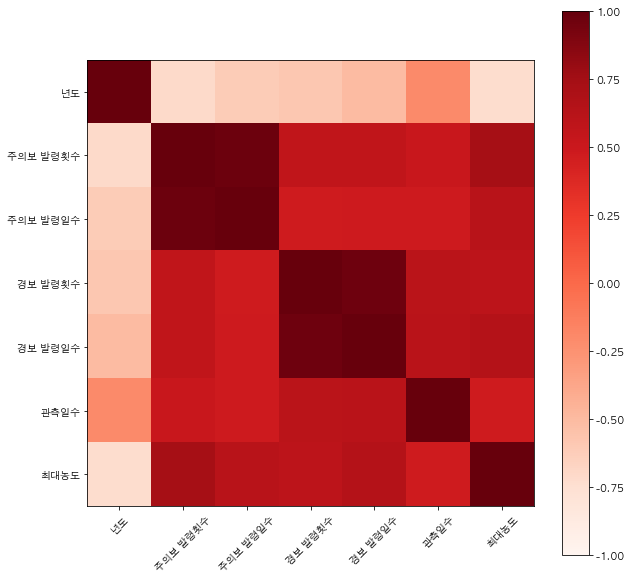

In [68]:
plt.figure(figsize = (10, 10))
plt.imshow(df.corr(), cmap = 'Reds', vmin = -1, vmax = 1)
plt.colorbar()
plt.xticks(ticks = range(df.columns.size), labels = df.columns, rotation = 45)
plt.yticks(ticks = range(df.columns.size), labels = df.columns)
plt.show()

In [82]:
dia = pd.read_csv('data/diamonds.csv')
dia.shape

(53940, 10)

In [83]:
dia.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

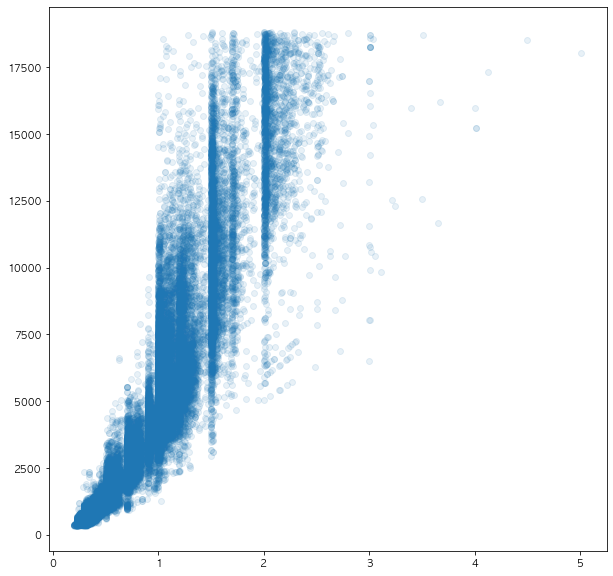

In [84]:
# carat과 price간의 관계를 산점도로 시각화
plt.figure(figsize = (10, 10))
plt.scatter(dia['carat'], dia['price'], alpha = 0.1)
plt.show()

In [85]:
dia[['carat', 'price']].corr()

,carat,price
carat,1.000000,0.921591
price,0.921591,1.000000


# 3. 막대그래프 (Bar plot) 그리기
## 3.1 막대그래프(Bar plot)

- 수량을 막대 형식으로 나타낸 그래프
- axes.bar(x, width) 메소드 사용
    - x : x값, height:  막대 높이
        - X는 분류값, height는 개수
- axes.barh(y, height) 메소드
    - 수평막대 그래프
    - 1번인수: y값, 2번인수: 막대 너비    

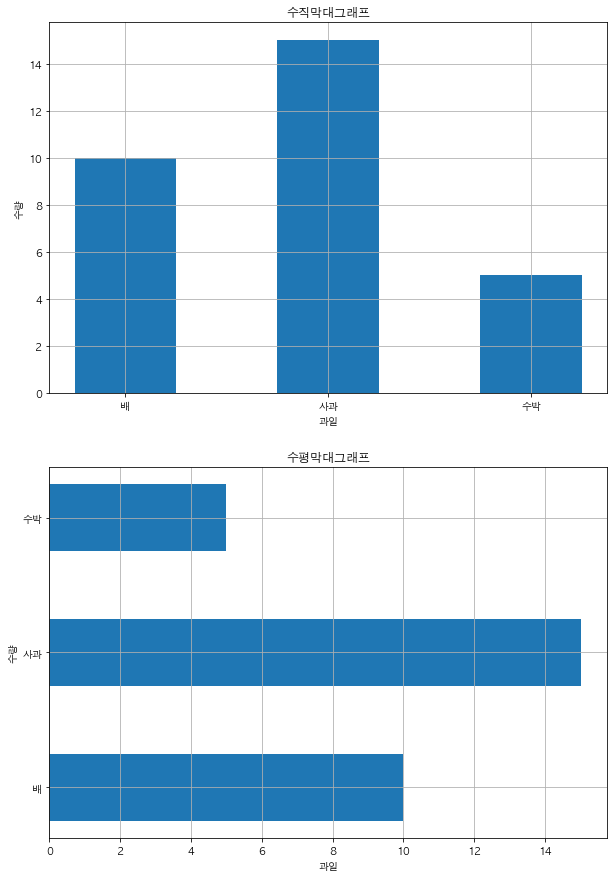

In [95]:
fruits = ['배', '사과', '수박']
amount = [10, 15, 5]

fig, axes = plt.subplots(2, 1, figsize = (10, 15))
axes[0].bar(fruits, amount, width = 0.5)  # width 기본값: 0.8 / 0 ~ 1 사이값으로 굵기를 정할 수 있다.
axes[0].set_title('수직막대그래프')
axes[0].set_xlabel('과일')
axes[0].set_ylabel('수량')
axes[0].grid(True)

axes[1].barh(fruits, amount, height = 0.5)  # height 기본값: 0.8 / 0 ~ 1 사이값으로 굵기를 정할 수 있다.
axes[1].set_title('수평막대그래프')
axes[1].set_xlabel('과일')
axes[1].set_ylabel('수량')
axes[1].grid(True)

plt.show()

## 3.2 막대그래프 활용
- [강수량추이](http://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1401)

In [2]:
df = pd.read_excel('data/강수량.xlsx')
df.set_index('계절', inplace = True)
df

,2009,2010,2011,2012,2013,2014,2015,2016,2017
계절,,,,,,,,,
봄,231.3,302.9,256.9,256.5,264.3,215.9,223.2,312.8,118.6
여름,752.0,692.6,1053.6,770.6,567.5,599.8,387.1,446.2,609.7
가을,143.1,307.6,225.5,363.5,231.2,293.1,247.7,381.6,172.5
겨울,142.3,98.7,45.6,139.3,59.9,76.9,109.1,108.1,75.6


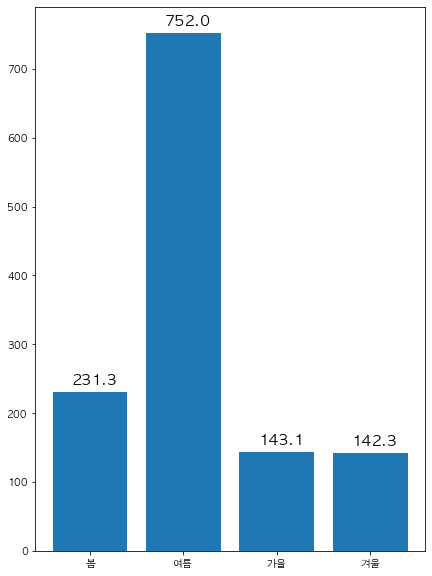

In [3]:
# 2009년 계절별 강수량 비교
plt.figure(figsize = (7, 10))
plt.bar(df.index, df[2009])

for idx, rain in enumerate(df[2009]):
    plt.text(idx - 0.2, rain + 10, rain, fontsize = 15)  # plt.text(x,y,text)로 (x,y) 위치에 text를 출력한다
    

plt.show()

2009 231.3
2010 302.9
2011 256.9
2012 256.5
2013 264.3
2014 215.9
2015 223.2
2016 312.8
2017 118.6


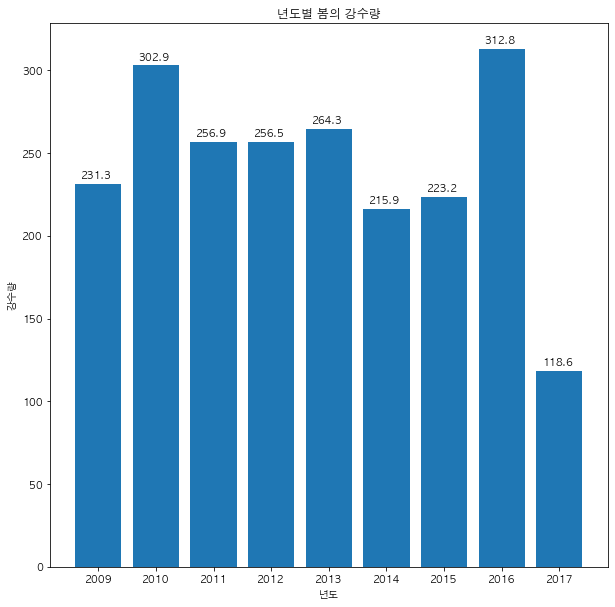

In [4]:
# 년도별 봄의 강수량
plt.figure(figsize = (10, 10))
plt.bar(df.columns, df.loc['봄'])

plt.title('년도별 봄의 강수량')
plt.xlabel('년도')
plt.ylabel('강수량')

for idx, rain in zip(df.columns, df.loc['봄']):
    print(idx, rain)
    plt.text(idx - 0.3, rain + 3, rain)

plt.xticks(df.columns.astype('int'))  # columns에 숫자가 문자열 형태로 저장되어있기때문에, 숫자형으로 변환

plt.show()

231.3 2009
302.9 2010
256.9 2011
256.5 2012
264.3 2013
215.9 2014
223.2 2015
312.8 2016
118.6 2017


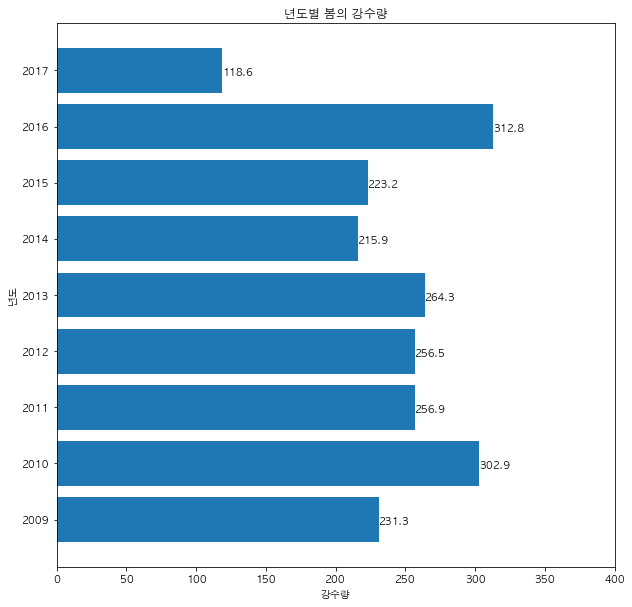

In [8]:
# 년도별 봄의 강수량
plt.figure(figsize = (10, 10))
plt.barh(df.columns, df.loc['봄'])

plt.title('년도별 봄의 강수량')
plt.ylabel('년도')
plt.xlabel('강수량')

for rain, idx in zip(df.loc['봄'], df.columns):
    print(rain, idx)
    plt.text(rain, idx - 0.1, rain)
    
plt.yticks(df.columns.astype('int'))  # columns에 숫자가 문자열 형태로 저장되어있기때문에, 숫자형으로 변환

plt.xlim(0, 400)  # 그래프의 x축 크기 조절(0 ~ 400의 사이즈로 설정해준다.)
#plt.ylim(2011, 2016)  # 2011 ~ 2016의 사이즈로 y축을 출력한다.
plt.show()
